# Task 7: Dimensionality Reduction & Stock Price Prediction

# Part 1: Dimensionality Reduction

In [14]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
# Step 2: Load the dataset
data_path = r"C:\Users\HP\Downloads\high_dimensional_dataset.csv"
df = pd.read_csv(data_path)

In [3]:
# Step 3: Explore the dataset
print(df.head())
print(df.info())

   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   3.745401   9.507143   7.319939   5.986585   1.560186   1.559945   
1   0.205845   9.699099   8.324426   2.123391   1.818250   1.834045   
2   6.118529   1.394939   2.921446   3.663618   4.560700   7.851760   
3   6.075449   1.705241   0.650516   9.488855   9.656320   8.083973   
4   1.220382   4.951769   0.343885   9.093204   2.587800   6.625223   

   Feature_7  Feature_8  Feature_9  Feature_10    Species  
0   0.580836   8.661761   6.011150    7.080726  Species_B  
1   3.042422   5.247564   4.319450    2.912291  Species_B  
2   1.996738   5.142344   5.924146    0.464504  Species_A  
3   3.046138   0.976721   6.842330    4.401525  Species_A  
4   3.117111   5.200680   5.467103    1.848545  Species_B  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature_1   150 non-n

In [4]:
# Step 4: Preprocess the data
# Assuming the target column is the last one (modify if needed)
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target/Labels

In [5]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Step 5: Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
# Step 6: Create a new DataFrame for the reduced dataset
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

In [11]:
# Step 7: Save the reduced dataset
pca_df.to_csv(r'C:\Users\HP\Downloads\reduced_dataset.csv', index=False)

In [15]:
# Convert categorical target labels into numeric values
label_encoder = LabelEncoder()
pca_df['target_numeric'] = label_encoder.fit_transform(pca_df['target'])

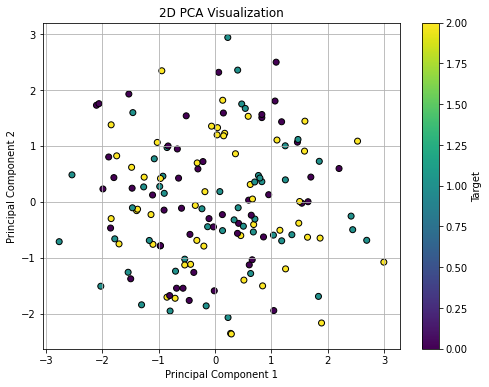

In [16]:
# Step 8: Visualize the reduced data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_df['PC1'], 
    pca_df['PC2'], 
    c=pca_df['target_numeric'],
    cmap='viridis', 
    edgecolor='k')
plt.colorbar(scatter, label='Target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.grid(True)
plt.show()

# Part 2: Stock Price Prediction Using Time Series Forecasting

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
# Step 1: Load and Preprocess the Dataset
file_path = r"C:\Users\HP\Downloads\stock_prices.csv"
stock_prices = pd.read_csv(file_path)

In [19]:
# Ensure data is sorted by date
stock_prices.sort_index(inplace=True)

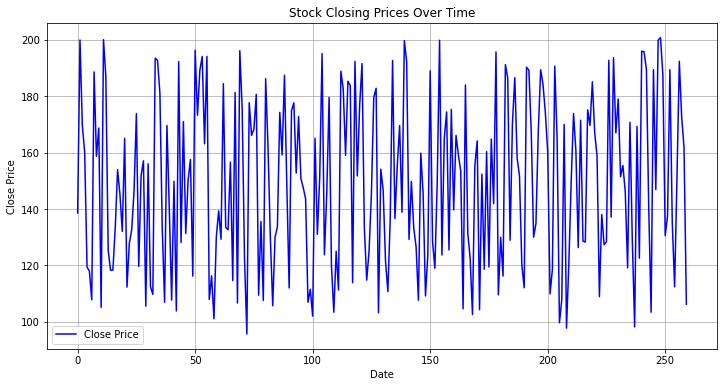

In [20]:
# Step 2: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
plt.plot(stock_prices['Close'], label='Close Price', color='blue')
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

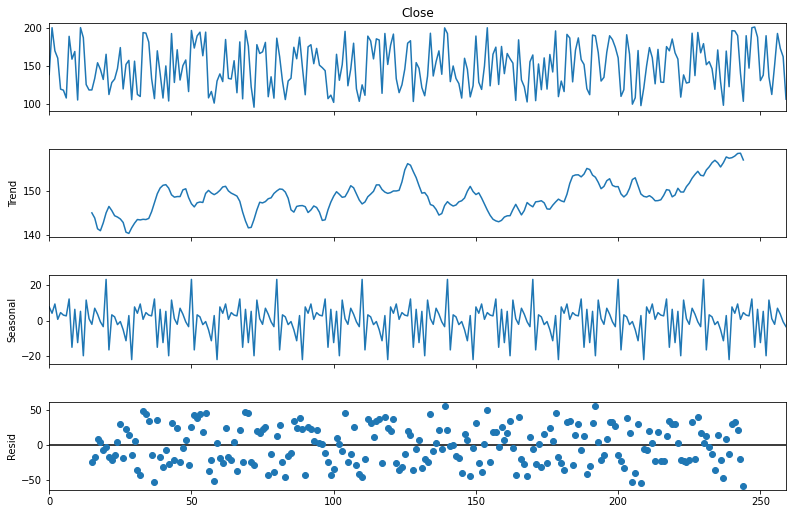

In [21]:
# Decompose time series (Trend, Seasonality, Residuals)
decomposition = seasonal_decompose(stock_prices['Close'], model='additive', period=30)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

In [22]:
# Step 3: Feature Engineering
# Create lag features
stock_prices['Close_Lag1'] = stock_prices['Close'].shift(1)

In [23]:
# Create rolling window features
stock_prices['Close_MA7'] = stock_prices['Close'].rolling(window=7).mean()

In [24]:
# Drop NaN values
stock_prices.dropna(inplace=True)

In [25]:
# Step 4: Train and Tune the ARIMA Model
# Split data into training and test sets
train_size = int(len(stock_prices) * 0.8)
train, test = stock_prices[:train_size], stock_prices[train_size:]

In [26]:
# Fit the ARIMA model
model = ARIMA(train['Close'], order=(5, 1, 2))
model_fit = model.fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [27]:
# Display model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  203
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -972.942
Date:                Thu, 27 Mar 2025   AIC                           1961.884
Time:                        17:07:51   BIC                           1988.350
Sample:                             0   HQIC                          1972.592
                                - 203                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9031      0.142     -6.374      0.000      -1.181      -0.625
ar.L2         -0.0351      0.100     -0.349      0.727      -0.232       0.162
ar.L3         -0.0946      0.096     -0.987      0.3

In [28]:
# Step 5: Model Evaluation & Visualization
# Make predictions
predictions = model_fit.forecast(steps=len(test))

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [29]:
# Evaluate the model
mae = mean_absolute_error(test['Close'], predictions)
rmse = np.sqrt(mean_squared_error(test['Close'], predictions))
print(f"MAE: {mae}, RMSE: {rmse}")

MAE: 25.518955928462642, RMSE: 29.699774212901005


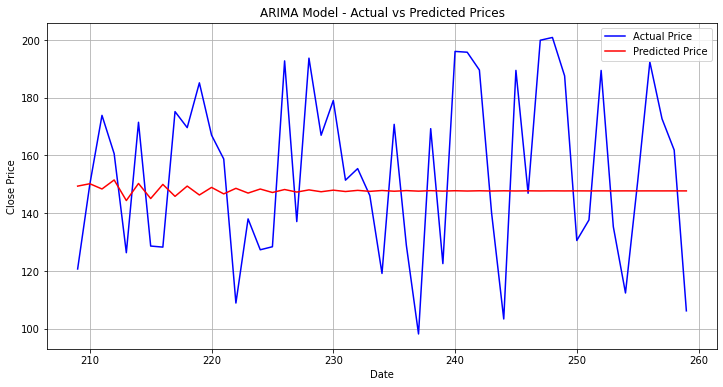

In [30]:
# Plot actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label='Actual Price', color='blue')
plt.plot(test.index, predictions, label='Predicted Price', color='red')
plt.title('ARIMA Model - Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()